In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

$c: [0,1] \rightarrow \mathbb{R}^2$

In [ ]:
spacing1 = 1
spacing2 = .1

t1 = np.arange(0,1+spacing1,spacing1)
t2 = np.arange(0,1+spacing2,spacing2)

def c(t):
    c1 =  0*t
    c2 = 2*t - 1
    c = np.stack([c1, c2], axis=1)
    return c

c1 = c(t1)
c2 = c(t2)

$V:\mathbb{R}^2 \rightarrow \mathbb{R}^2$

In [ ]:
def k(x):
    k = np.exp(-(1/(2))*np.linalg.norm(x)**2)
    return k

x = np.array([[0,-1], [0,0], [0,1]])
y = np.array([[0,-1], [1,0], [0,1]])


v = y - x
K = np.zeros([x.shape[0], x.shape[0]])

for i in range(K.shape[1]):
    for j in range(K.shape[1]):
        K[i,j] = k(x[i,:] - x[j,:])

P = np.dot(np.linalg.inv(K), v)

def V(xi):
    K = np.zeros((1, x.shape[0]))
    for j in range(K.shape[1]):
        K[:,j] = k(xi - x[j,:])

    vi = np.dot(K, P)
    return np.squeeze(vi)


In [ ]:
xc,yc = np.meshgrid(np.linspace(-2,2,17),np.linspace(-1,1,9))

u = 0*xc
v = 0*xc
for i in range(u.shape[0]):
    for j in range(u.shape[1]):
        vi = V(np.array([xc[i,j], yc[i,j]]))
        u[i,j] = vi[0]
        v[i,j] = vi[1]


$V(c(t))$

In [ ]:
Vc1 = 0*c1

for i, ct in enumerate(c1):
    Vc1[i,:] = ct + V(ct)

Vc2 = 0*c2

for i, ct in enumerate(c2):
    Vc2[i,:] = ct + V(ct)

In [ ]:
f, axs = plt.subplots(2,3, sharey=True)

headwidth=5
fontdict = {"fontsize": 16}

ax = axs[0,0]
ax.quiver(xc,yc,u,v, headwidth=headwidth)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.set_title('a)', loc='left', fontdict = fontdict)


ax = axs[0,1]
ax.scatter(c1[:,0], c1[:,1])
ax.plot(c1[:,0], c1[:,1])
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.set_xlim([-2,2])
ax.set_title('b)', loc='left', fontdict = fontdict)


ax = axs[0,2]
ax.scatter(Vc1[:,0], Vc1[:,1])
ax.plot(Vc1[:,0], Vc1[:,1])
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.set_xlim([-2,2])
ax.set_title('c)', loc='left', fontdict = fontdict)

ax = axs[1,0]
ax.quiver(xc,yc,u,v, headwidth=headwidth)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.set_title('d)', loc='left', fontdict = fontdict)


ax = axs[1,1]
ax.scatter(c2[:,0], c2[:,1])
ax.plot(c2[:,0], c2[:,1])
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.set_xlim([-2,2])
ax.set_title('e)', loc='left', fontdict = fontdict)


ax = axs[1,2]
ax.scatter(Vc2[:,0], Vc2[:,1])
ax.plot(Vc2[:,0], Vc2[:,1])
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.set_xlim([-2,2])
ax.set_title('f)', loc='left', fontdict = fontdict)

f.set_figheight(10)
f.set_figwidth(15)


# Interpolation

### Generate underlying curve

In [ ]:
from bezier.curve import Curve
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

def curve(x):
    return 1/(1+np.exp(-10*x))

spacing = 0.01
x = np.arange(-1,1+spacing, spacing, dtype=float)
y = curve(x)

plt.plot(x, y)
plt.show()

sp = np.fft.fft(y)
freq = np.fft.fftfreq(n=x.shape[-1], d = spacing)
sp = np.array([x for _, x in sorted(zip(freq, sp))])
freq = [y for y, _ in sorted(zip(freq, sp))]
plt.plot(freq, np.abs(sp))
plt.ylabel("FT magnitude")
plt.xlabel("Frequency (rev/time)")
plt.xlim(-10,10)

## Sinc interpolation

In [ ]:
def sinc(x):
    x_pi = np.multiply(x, np.pi)
    y = np.divide(np.sin(x_pi), x_pi)
    y[np.isnan(y)] = 1
    return y

def interpolation(interp_x, sample_n, sample_y):
    interp_y = interp_x*0
    for n, y in zip(sample_n,sample_y):
        interp_y += y* sinc(2*W*interp_x - n)
    return interp_y

#vary badnwidth/rate of sampling
plt.plot(x, y, label="true")
max = 1
for W in range(1,10,2 ):
    samples_n = np.arange(-max*2*W, max*2*W+1)
    samples_x = samples_n/(2*W)
    samples_y = curve(samples_x)
    
    plt.plot(x, interpolation(x, samples_n, samples_y), label=f"W={W}, range=[{-max, max}]")

plt.legend()
plt.title("Change Sampling Frequency")
plt.show()

#vary range of sampling
plt.plot(x, y, label="true")
W = 5
for max in range(1,10, 2):
    samples_n = np.arange(-max*2*W, max*2*W+1)
    samples_x = samples_n/(2*W)
    samples_y = curve(samples_x)
    
    plt.plot(x, interpolation(x, samples_n, samples_y), label=f"W={W}, range=[{-max, max}]")

plt.legend()
plt.title("Change Sampling Range")
plt.show()

# Examin errors
maxes = []
Ws = []
sqe = []
for max in range(1,10, 2):
    for W in range(1,10,2 ):
        samples_n = np.arange(-max*2*W, max*2*W+1)
        samples_x = samples_n/(2*W)
        samples_y = curve(samples_x)
        sq_error = np.linalg.norm(y - interpolation(x, samples_n, samples_y)) ** 2
        sqe.append(sq_error)
        Ws.append(W)
        maxes.append(f"[{-max},{max}]")

dict = {"Sampling Range": maxes, "Bandwidth": Ws, "Squared Error": sqe}
df = pd.DataFrame(data=dict)

result = df.pivot(index="Bandwidth", columns="Sampling Range", values="Squared Error")

sns.heatmap(result, annot=True, cmap='viridis')
plt.title("Sinc Squared errors")
plt.show()


## B-spline interpolation

In [ ]:
from scipy.interpolate import splrep, splev


#vary badnwidth/rate of sampling
plt.plot(x, y, label="true")
max = 1
for W in range(1,10, 2):
    samples_n = np.arange(-max*2*W, max*2*W+1)
    samples_x = samples_n/(2*W)
    samples_y = curve(samples_x)
    
    tck = splrep(samples_x, samples_y)
    plt.plot(x, splev(x, tck), label=f"W={W}, range=[{-max, max}]")

plt.legend()
plt.title("Change Sampling Frequency")
plt.show()

#vary range of sampling
plt.plot(x, y, label="true")
W = 5
for max in range(1,10, 2):
    samples_n = np.arange(-max*2*W, max*2*W+1)
    samples_x = samples_n/(2*W)
    samples_y = curve(samples_x)
    
    tck = splrep(samples_x, samples_y)
    plt.plot(x, splev(x, tck), label=f"W={W}, range=[{-max, max}]")

plt.legend()
plt.title("Change Sampling Range")
plt.show()

# Examin errors
maxes = []
Ws = []
sqe = []
for max in range(1,10, 2):
    for W in range(1,10,2 ):
        samples_n = np.arange(-max*2*W, max*2*W+1)
        samples_x = samples_n/(2*W)
        samples_y = curve(samples_x)
        tck = splrep(samples_x, samples_y)
        sq_error = np.linalg.norm(y - splev(x, tck)) ** 2
        sqe.append(sq_error)
        Ws.append(W)
        maxes.append(f"[{-max},{max}]")

dict = {"Sampling Range": maxes, "Bandwidth": Ws, "Squared Error": sqe}
df = pd.DataFrame(data=dict)

result = df.pivot(index="Bandwidth", columns="Sampling Range", values="Squared Error")

sns.heatmap(result, annot=True, cmap='viridis')
plt.title("B-spline Squared errors")
plt.show()


# Read cloudvolume skeletons

In [103]:
from cloudvolume import CloudVolume
import numpy as np
import networkx as nx


vol_skel = CloudVolume("precomputed://https://open-neurodata.s3.amazonaws.com/brainlit/brain2_segments", mip=0)
vol_im = CloudVolume("precomputed://https://open-neurodata.s3.amazonaws.com/brainlit/brain2", mip=6)

### Resolution is in microns, image coordinates/shape is in voxels

In [104]:
print("Dimensions of mouse braiin (mm):")
np.multiply(vol_im.resolution, vol_im.shape[:3])/1000000

Dimensions of mouse braiin (mm):


Vec(10.479330996223998,7.995287998464001,10.21188199424, dtype=float64)

### Create nx object from skeleton

In [105]:
nx_nodes = []
for idx, coord in enumerate(vol_skel.skeleton.get(1).vertices):
    nx_nodes.append((idx, {"coord (nm)": coord}))

G = nx.DiGraph()
G.add_nodes_from(nx_nodes)

nx_edges = []
for idx, edge in enumerate(vol_skel.skeleton.get(1).edges):
    dist = np.linalg.norm(G.nodes[edge[0]]["coord (nm)"]-G.nodes[edge[1]]["coord (nm)"])
    nx_edges.append((edge[1], edge[0], {"dist": dist}))
G.add_edges_from(nx_edges)

path = nx.dag_longest_path(G, weight="dist")




<AxesSubplot:xlabel='Sample Spacing (microns)', ylabel='Count'>

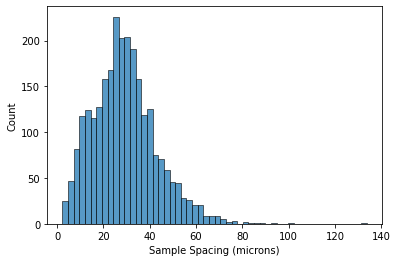

In [111]:
import seaborn as sns
import pandas as pd 

dists = []
for e in nx_edges:
    dists.append(e[2]['dist']/1000)
dict = {"Sample Spacing (microns)": dists}
df = pd.DataFrame(dict)
sns.histplot(df, x="Sample Spacing (microns)")


In [ ]:
coords = []
for node in path:
    coords.append(list(G.nodes[node]["coord (nm)"]))

with open('/Users/thomasathey/Desktop/coords.txt', 'w') as f:
    for c in coords:
        coord = np.divide(c, vol_im.resolution)
        f.write(f'[{coord[0]},{coord[1]},{coord[2]}]')
        f.write(f'\n')
print(len(coords))

def resample(pt1, pt2):
    diff = pt2-pt1
    dist = np.linalg.norm(diff)
    if dist <= 5000:
        return [pt1]
    else:
        ss = np.arange(0, dist, 5000)
        return [pt1 + s*diff/dist for s in ss]

path = nx.dag_longest_path(G, weight="dist")
coords_resampled = []
for node1, node2 in zip(path[:-1],path[1:]):
    pts = resample(G.nodes[node1]["coord (nm)"],G.nodes[node2]["coord (nm)"])
    for pt in pts:
        coords_resampled.append(list(pt))
coords_resampled.append(list(G.nodes[node2]["coord (nm)"]))

with open('/Users/thomasathey/Desktop/coords_resampled.txt', 'w') as f:
    for c in coords_resampled:
        coord = np.divide(c, vol_im.resolution)
        f.write(f'[{coord[0]},{coord[1]},{coord[2]}]')
        f.write(f'\n')

print(len(coords_resampled))

In [ ]:
from cloudreg.scripts.transform_points import NGLiink
from .visualization import create_viz_link_from_json

viz_link_init = 

atlas_viz = NGLink(viz_link_init.split("json_url=")[-1])
ngl_json = atlas_viz._json
ngl_json['layers'].append(
    {
        "type": "annotation",
        "annotations": [[1000,1000,1000]],
        "name": "transformed_points"
    }   
)
viz_link = create_viz_link_from_json(ngl_json)

python -m cloudreg.scripts.transform_points --target_viz_link --atlas_viz_link --affine_path --velocity_path --velocity_voxel_size --transformation_direction

In [92]:
import json
with open("/Users/thomasathey/Documents/mimlab/mouselight/axon_mapping/diff_sampling/transformed_points.json") as f:
    data = json.load(f)
with open("/Users/thomasathey/Documents/mimlab/mouselight/axon_mapping/diff_sampling/transformed_points_resample.json") as f:
    data_resample = json.load(f)

In [97]:
transformed_path = []
for pt in data:
    transformed_path.append(np.multiply(pt["point"], 10))

transformed_path_resample = []
for pt in data_resample:
    transformed_path_resample.append(np.multiply(pt["point"], 10))

print(f"Transformed paths have length {len(transformed_path)} and {len(transformed_path_resample)}")

Transformed paths have length 215 and 1701


(215,)
(1701,)


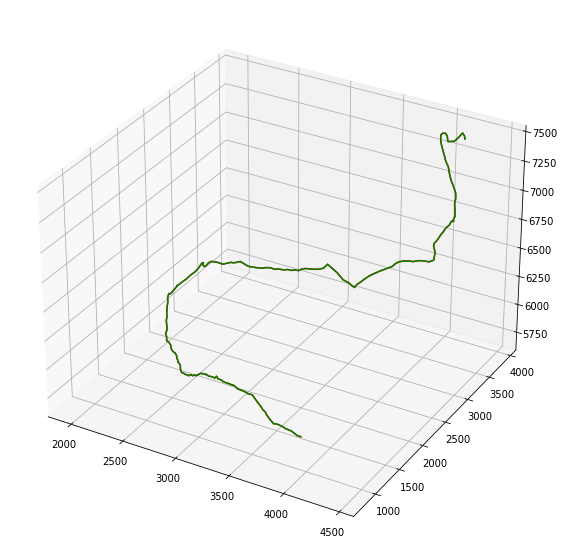

In [98]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

transformed_path_np = np.array(transformed_path)
# Data for a three-dimensional line
zline = transformed_path_np[:,0]
xline = transformed_path_np[:,1]
yline = transformed_path_np[:,2]
ax.plot3D(xline, yline, zline, 'red')
print(f"{xline.shape}")

transformed_path_resample_np = np.array(transformed_path_resample)
# Data for a three-dimensional line
zline = transformed_path_resample_np[:,0]
xline = transformed_path_resample_np[:,1]
yline = transformed_path_resample_np[:,2]
ax.plot3D(xline, yline, zline, 'green')
print(f"{xline.shape}")
plt.show()


In [100]:
import similaritymeasures

def resample(pt1, pt2, spacing=5):
    diff = pt2-pt1
    dist = np.linalg.norm(diff)
    if dist <= spacing:
        return [pt1]
    else:
        ss = np.arange(0, dist, spacing)
        return [pt1 + s*diff/dist for s in ss]

transformed_path_resampled = []
for node1, node2 in zip(transformed_path[:-1],transformed_path[1:]):
    pts = resample(node1,node2)
    for pt in pts:
        transformed_path_resampled.append(pt)
transformed_path_resampled.append(node2)

transformed_path_resample_resampled = []
for node1, node2 in zip(transformed_path_resample[:-1],transformed_path_resample[1:]):
    pts = resample(node1,node2)
    for pt in pts:
        transformed_path_resample_resampled.append(pt)
transformed_path_resample_resampled.append(node2)

print(f"Discrete frechet distance between lists of length {len(transformed_path_resampled)} and {len(transformed_path_resample_resampled)}")

df = similaritymeasures.frechet_dist(transformed_path_resampled, transformed_path_resample_resampled)

Discrete frechet distance between lists of length 1895 and 3206


In [102]:
df

2.4993766981671426